# Imports

In [0]:
%tensorflow_version 2.x


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt


#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

# Working with a dataset

##Load and explore the dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#importamos y cargamos el set de datos de MINST 
#(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [298]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
#class_names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


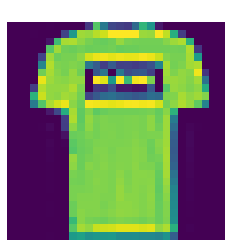

In [300]:
plt.imshow(train_images[1])
plt.title(class_names[train_labels[1]])
plt.axis('off')
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [301]:

train_images = (train_images-np.mean(train_images)) / np.std(train_images)
train_images = train_images / 255

#train_images = tf.squeeze(tf.image.rgb_to_grayscale(train_images))

#test_images = (test_images-np.mean(test_images)) / np.std(test_images)
#test_images = tf.squeeze(tf.image.rgb_to_grayscale(test_images / 255))
test_images = test_images /255
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

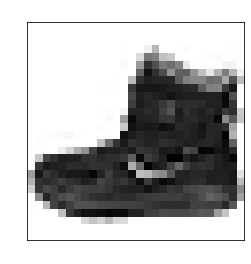

In [302]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[9])
plt.show()

## Explore final dataset

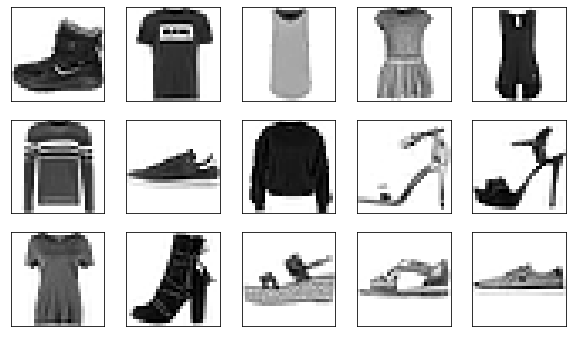

In [303]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='w')
plt.show()

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [314]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [315]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.3,
          epochs=10
          )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 143us/sample - loss: 0.9380 - accuracy: 0.7043 - val_loss: 0.6320 - val_accuracy: 0.7732
Epoch 2/10
42000/42000 [==============================] - 6s 132us/sample - loss: 0.5778 - accuracy: 0.7943 - val_loss: 0.5344 - val_accuracy: 0.8091
Epoch 3/10
42000/42000 [==============================] - 6s 132us/sample - loss: 0.5108 - accuracy: 0.8200 - val_loss: 0.4963 - val_accuracy: 0.8212
Epoch 4/10
42000/42000 [==============================] - 5s 130us/sample - loss: 0.4762 - accuracy: 0.8332 - val_loss: 0.4711 - val_accuracy: 0.8322
Epoch 5/10
42000/42000 [==============================] - 6s 132us/sample - loss: 0.4537 - accuracy: 0.8412 - val_loss: 0.4502 - val_accuracy: 0.8408
Epoch 6/10
42000/42000 [==============================] - 6s 131us/sample - loss: 0.4364 - accuracy: 0.8468 - val_loss: 0.4377 - val_accuracy: 0.8442
Epoch 7/10
42000/42000 [==========================

# Evaluate

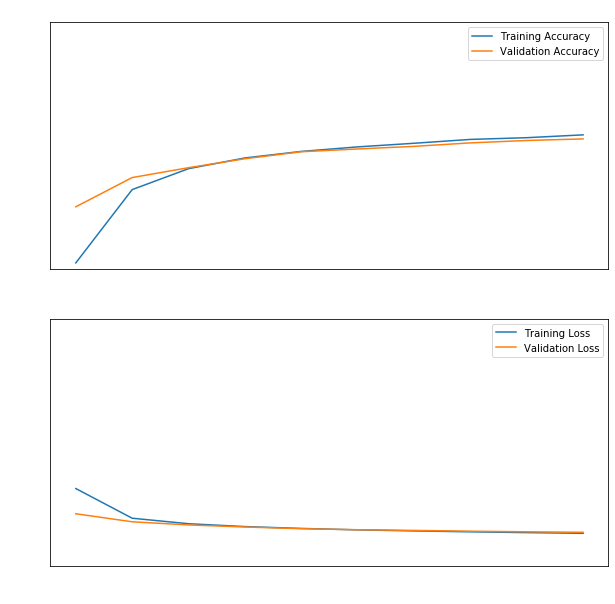

In [322]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0,3])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [317]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 24.51880190887451
Accuracy: 0.7355


# Make predictions

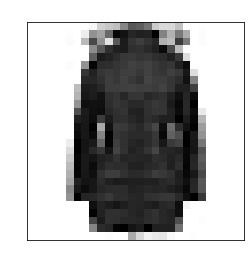


Predicted class is: Coat


In [318]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])


Predicted class is: Bag


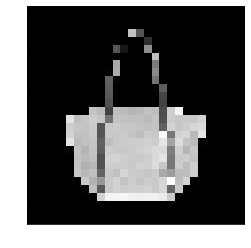

In [319]:
test_image = tf.keras.utils.get_file('car6.jpg','https://tottocr.vteximg.com.br/arquivos/ids/179907-1000-1000/Bolso-Porta-Tablet-para-Mujer-Tossa-M-morado-damson_1.jpg?v=636907133688300000')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])